In [5]:
import scipy.stats as sps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### 1. Работа с библиотекой `scipy.stats`.

<b>Общий принцип:</b>

Пусть $X$ — класс, реализующий некоторое распределение. Конкретное распределение с параметрами `params` можно получить как **`X(params)`**. У него доступны следующие методы:


* `X(params).rvs(size=N)` — генерация выборки размера $N$ (<b>R</b>andom <b>V</b>ariate<b>S</b>). Возвращает `numpy.array`;
* `X(params).cdf(x)` — значение функции распределения в точке $x$ (<b>C</b>umulative <b>D</b>istribution <b>F</b>unction);
* `X(params).logcdf(x)` — значение логарифма функции распределения в точке $x$;
* `X(params).ppf(q)` — $q$-квантиль (<b>P</b>ercent <b>P</b>oint <b>F</b>unction);
* `X(params).mean()` — математическое ожидание;
* `X(params).median()` — медиана ($1/2$-квантиль);
* `X(params).var()` — дисперсия (<b>Var</b>iance);
* `X(params).std()` — стандартное отклонение = корень из дисперсии (<b>St</b>andard <b>D</b>eviation).

Кроме того для непрерывных распределений определены функции
* `X(params).pdf(x)` — значение плотности в точке $x$ (<b>P</b>robability <b>D</b>ensity <b>F</b>unction);
* `X(params).logpdf(x)` — значение логарифма плотности в точке $x$.

А для дискретных
* `X(params).pmf(k)` — значение дискретной плотности в точке $k$ (<b>P</b>robability <b>M</b>ass <b>F</b>unction);
* `X(params).logpdf(k)` — значение логарифма дискретной плотности в точке $k$.

Все перечисленные выше методы применимы как к конкретному распределению `X(params)`, так и к самому классу `X`. Во втором случае параметры передаются в сам метод. Например, вызов `X.rvs(size=N, params)` эквивалентен `X(params).rvs(size=N)`. При работе с распределениями и случайными величинами рекомендуем использовать первый способ, посколько он больше согласуется с математическим синтаксисом теории вероятностей.

Параметры могут быть следующими:
* `loc` — параметр сдвига;
* `scale` — параметр масштаба;
* и другие параметры (например, $n$ и $p$ для биномиального).

---

Для примера сгенерируем выборку размера $N = 200$ из распределения $\mathcal{N}(1, 9)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.norm`, а `params` = (`loc=1, scale=3`).

*Примечание.* Выборка — набор независимых одинаково распределенных случайных величин. Часто в разговорной речи выборку отождествляют с ее *реализацией* — значения случайных величин из выборки при "выпавшем" элементарном исходе.

In [6]:
sample = sps.norm(loc=1, scale=3).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [ 2.40349753  5.16926235 -5.01332986  8.80394597  2.20745404  6.37398288
  0.23953433 -0.02458834  5.98577384  0.05217771]
Выборочное среденее: 1.326
Выборочная дисперсия: 9.593


Вероятностные характеристики

In [7]:
print('Плотность:\t\t', sps.norm(loc=1, scale=3).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=1, scale=3).cdf([-1, 0, 1, 2, 3]))

Плотность:		 [0.10648267 0.12579441 0.13298076 0.12579441 0.10648267]
Функция распределения:	 [0.25249254 0.36944134 0.5        0.63055866 0.74750746]


$p$-квантиль распределения с функцией распределения $F$ — это число $min\{x: F(x) \geqslant p\}$.

In [8]:
print('Квантили:', sps.norm(loc=1, scale=3).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [-3.93456088 -2.8446547   1.          4.8446547   5.93456088]


Cгенерируем выборку размера $N = 200$ из распределения $Bin(10, 0.6)$ и посчитаем некоторые статистики.
В терминах выше описанных функций у нас $X$ = `sps.binom`, а `params` = (`n=10, p=0.6`).

In [9]:
sample = sps.binom(n=10, p=0.6).rvs(size=200)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [5 4 8 7 5 4 5 5 7 8]
Выборочное среденее: 5.930
Выборочная дисперсия: 2.315


In [10]:
print('Дискретная плотность:\t', sps.binom(n=10, p=0.6).pmf([-1, 0, 5, 5.5, 10]))
print('Функция распределения:\t', sps.binom(n=10, p=0.6).cdf([-1, 0, 5, 5.5, 10]))

Дискретная плотность:	 [0.00000000e+00 1.04857600e-04 2.00658125e-01 2.34848964e-01
 6.04661760e-03]
Функция распределения:	 [0.00000000e+00 1.04857600e-04 3.66896742e-01 3.66896742e-01
 1.00000000e+00]


In [11]:
print('Квантили:', sps.binom(n=10, p=0.6).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Квантили: [3. 4. 6. 8. 8.]


Бывает так, что <b>надо сгенерировать выборку из распределения, которого нет в `scipy.stats`</b>.
Для этого надо создать класс, который будет наследоваться от класса `rv_continuous` для непрерывных случайных величин и от класса `rv_discrete` для дискретных случайных величин.
<a  target="_blank" href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous">Пример из документации.</a>

Для примера сгенерируем выборку из распределения с плотностью $f(x) = \frac{4}{15} x^3 I\{x \in [1, 2] = [a, b]\}$.

In [12]:
class cubic_gen(sps.rv_continuous):
    def _pdf(self, x):
        return 4 * x ** 3 / 15
cubic = cubic_gen(a=1, b=2, name='cubic')

sample = cubic.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

Первые 10 значений выборки:
 [1.52619293 1.84058593 1.81498897 1.92602806 1.21979232 1.53583259
 1.85809309 1.97367824 1.85477521 1.87999464]
Выборочное среденее: 1.673
Выборочная дисперсия: 0.062


Если дискретная случайная величина может принимать небольшое число значений, то можно не создавать новый класс, как показано выше, а явно указать эти значения и из вероятности.

In [13]:
some_distribution = sps.rv_discrete(
    name='some_distribution', 
    values=([1, 2, 3], [0.6, 0.1, 0.3])  # значения и вероятности
)

sample = some_distribution.rvs(size=200)

print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Частота значений по выборке:', 
      (sample == 1).mean(), (sample == 2).mean(), (sample == 3).mean())

Первые 10 значений выборки:
 [1 1 3 1 1 3 3 1 1 1]
Выборочное среденее: 1.820
Частота значений по выборке: 0.54 0.1 0.36


**Задача 1.** Сгенерировать выборку размера 10 из распределения $\mathcal{N}(a, s)$. Для данной выборки подсчитайте выборочные зарактеристики. Постройте гистограмму, эмпирическую функцию распределения.



In [38]:
a = 1
s = 9

sample = sps.norm(loc=a, scale=s).rvs(size=10)
print('Первые 10 значений выборки:\n', sample[:10])
print('Выборочное среденее: %.3f' % sample.mean())
print('Выборочная дисперсия: %.3f' % sample.var())

print('Вероятностные характеристики')
print('Плотность:\t\t', sps.norm(loc=a, scale=s).pdf([-1, 0, 1, 2, 3]))
print('Функция распределения:\t', sps.norm(loc=a, scale=s).cdf([-1, 0, 1, 2, 3]))

print('Квантили:', sps.norm(loc=a, scale=s).ppf([0.05, 0.1, 0.5, 0.9, 0.95]))

Первые 10 значений выборки:
 [-22.68945531  12.59067602   8.01739779  -9.89950348   4.64899817
   1.67667752   5.0611823  -21.49587579  -5.27272699  -5.37595216]
Выборочное среденее: -3.274
Выборочная дисперсия: 129.725
Вероятностные характеристики
Плотность:		 [0.04324583 0.04405414 0.04432692 0.04405414 0.04324583]
Функция распределения:	 [0.41207045 0.45576412 0.5        0.54423588 0.58792955]
Квантили: [-13.80368264 -10.53396409   1.          12.53396409  15.80368264]


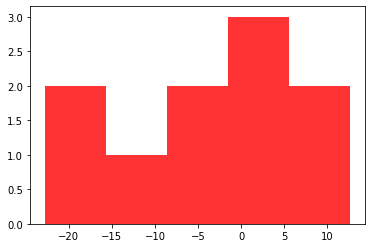

In [41]:
gistogram = plt.hist(sample, bins = 'auto', color='red', alpha=0.8)

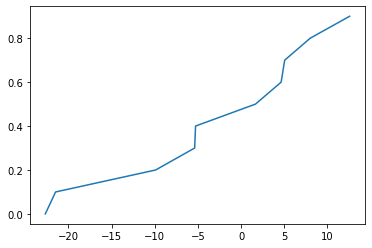

In [39]:
plt.plot(np.sort(sample), np.linspace(0, 1, len(sample), endpoint=False))

**Задача 2.** Скачайте <a href="https://www.kaggle.com/spscientist/students-performance-in-exams
">датасет</a> с данными о результатах учащихся на экзаменах.

Данный датасет состоит из таблицы баллов учащихся на экзаменах по математике, чтению и письму, а также дополнительной информации о студентах. Каждая строка соответствует одному учащемуся, каждый столбец соответствует одному признаку. В столбцах math score, reading score и writing score записаны баллы за экзамены.

Для исследования возьмите столбцы 'math score', 'reading score', 'writing score'.

----

Чтобы скачать данные, зарегистрируйтесь на сайте, после нажмите download на странице датасета и распакуйте скачанный архив. Вы получите файл формата `csv`.

Если вы работаете в Google Colab, можно загрузить полученный файл в разделе "Файлы" (значок папки) на левой панели.

In [42]:
# эта функция читает данные, в кавычках укажите путь к файлу на вашем компьютере или в Colab
df = pd.read_csv("./StudentsPerformance.csv")

In [43]:
#Посмотрите на первые строки этой таблицы.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [57]:
#Выберите несколько (3-6) столбцов для анализа значений в них.
# укажите столбцы данных 
# Пример: columns = ['math score', ...]
columns = ['math score', 'reading score', 'writing score']

df_chosen_columns = df[columns]

#Одномерный массив значений одного признака (например, 'math score') можно получить так:
#df_chosen_columns['math score']

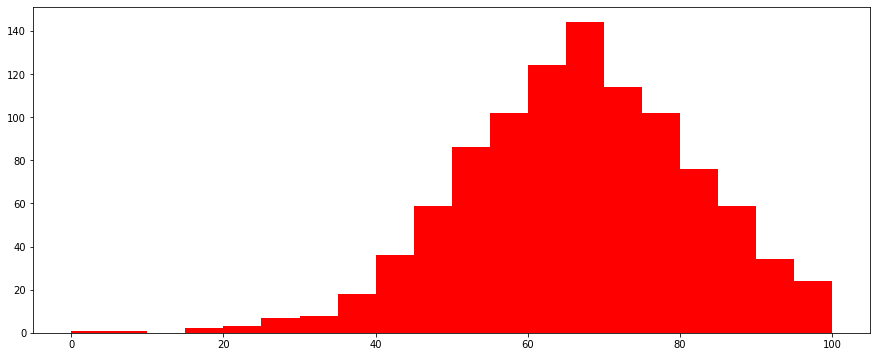

In [64]:
plt.figure(figsize=(15, 6))
plt.hist(df_chosen_columns['math score'], bins=20, color='red');
mathQ1 = df_chosen_columns['math score'].quantile(0.25)
mathQ3 = df_chosen_columns['math score'].quantile(0.75)
mathIQR = mathQ3 - mathQ1

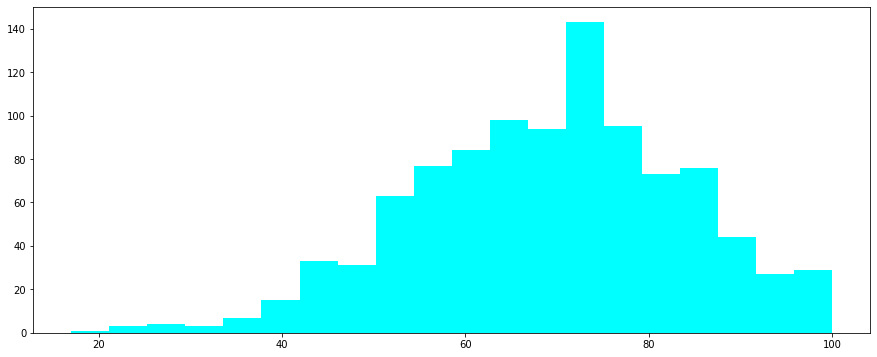

In [65]:
plt.figure(figsize=(15, 6))
plt.hist(df_chosen_columns['reading score'], bins=20, color='cyan');
readQ1 = df_chosen_columns['reading score'].quantile(0.25)
readQ3 = df_chosen_columns['reading score'].quantile(0.75)
readIQR = readQ3 - readQ1

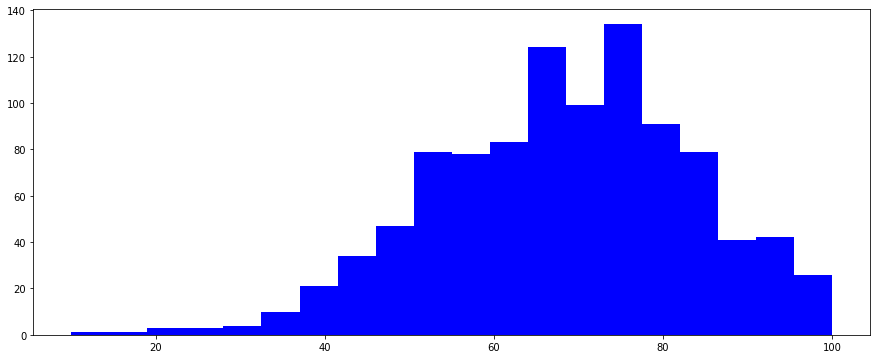

In [66]:
plt.figure(figsize=(15, 6))
plt.hist(df_chosen_columns['writing score'], bins=20, color='blue');
writQ1 = df_chosen_columns['writing score'].quantile(0.25)
writQ3 = df_chosen_columns['writing score'].quantile(0.75)
writIQR = writQ3 - writQ1

In [67]:
ranges_without_outliers = {
    'math score' : ((mathQ1 - 1.5*mathIQR), (mathQ3 + 1.5*mathIQR)),
    'reading score' : ((readQ1 - 1.5*readIQR), (readQ3 + 1.5*readIQR)),
    'writing score' : ((writQ1 - 1.5*writIQR), (writQ3 + 1.5*writIQR))
}

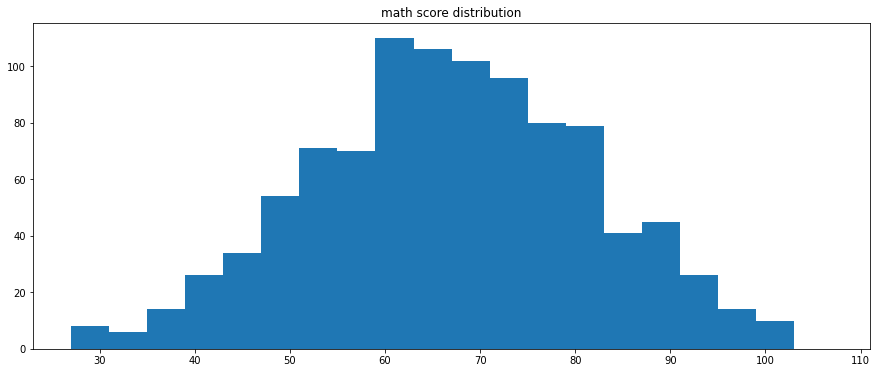

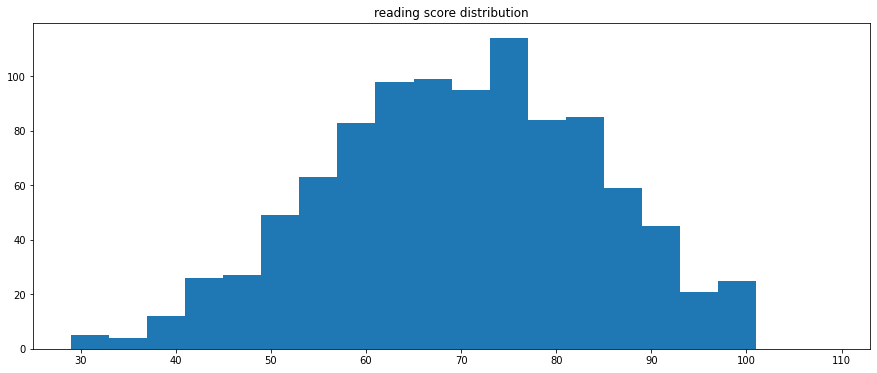

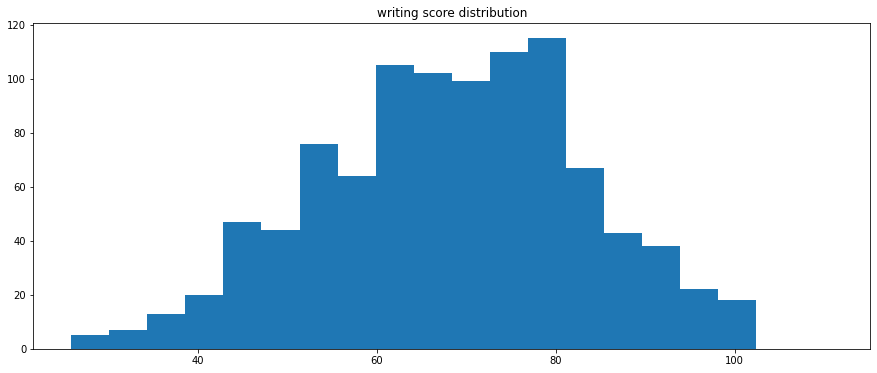

In [68]:
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(df_chosen_columns[column], range=column_range, bins=20)
    plt.title(column + ' distribution')

#### Гистограммы

Для каждого из выбранных признаков нарисуйте гистограмму распределения. Для этого воспользуйтесь функцией `matplotlib.pyplot.hist`.

Предположите, для каких признаков возможно наличие выбросов. Эту проблему можно решить с помощью параметра range, который определяет, в каких границах строится гистограмма.

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0.]),
 array([-3.  , -2.65, -2.3 , -1.95, -1.6 , -1.25, -0.9 , -0.55, -0.2 ,
         0.15,  0.5 ,  0.85,  1.2 ,  1.55,  1.9 ,  2.25,  2.6 ,  2.95,
         3.3 ,  3.65,  4.  ]),
 <BarContainer object of 20 artists>)

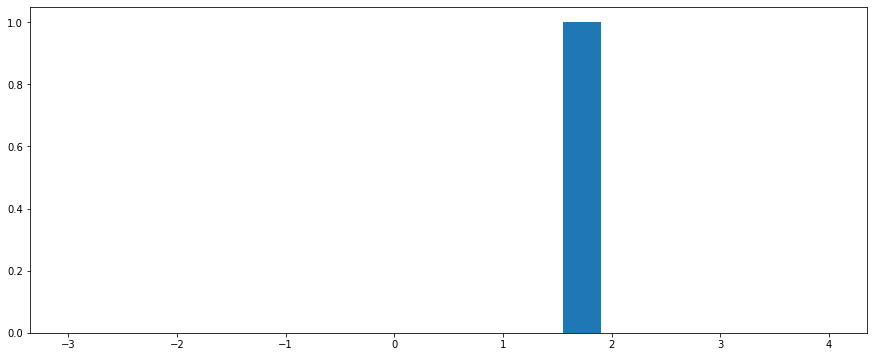

In [54]:
plt.figure(figsize=(15, 6))
plt.hist(sample, bins=20, range=(-3, 4))

В словаре ranges_without_outliers укажите, в каких пределах, по вашему мнению, стоит нарисовать гистограмму распределения для каждого признака.

In [59]:
ranges_without_outliers_example = {
    'column1' : (-1, 5),
    'column2' : (0, 3)
}

In [60]:
#Аналогично определите интервалы для исследуемых признаков
for column, column_range in ranges_without_outliers.items():
    plt.figure(figsize=(15, 6))
    plt.hist(<...>, range=column_range, bins=20)
    plt.title(column + ' distribution')

SyntaxError: invalid syntax (2250577858.py, line 4)

Сделайте выводы

Изменилась ли форма распределений, стали ли графики информативнее?